# Using both Python and R
#### Plots from the [paper: 2020KuehnPredicting resource usage ... in HEP](https://www.epj-conferences.org/articles/epjconf/abs/2020/21/epjconf_chep2020_07039/epjconf_chep2020_07039.html)
 - [R and Python in one Jupyter notebook: towardsdatascience](https://towardsdatascience.com/r-and-python-in-one-jupyter-notebook-4f7e9d7f4c54)
  - [R and Python in one Jupyter notebook: stackoverflow](https://stackoverflow.com/questions/37808170/r-and-python-in-one-jupyter-notebook)

In [1]:
import pandas as pd
# from pandas.compat import StringIO
from io import StringIO
import numpy as np
import plotnine as p9 # ggplot2 for Python (https://realpython.com/ggplot-python/)
from plotnine import *
# setprintOptions = pd.set_option('display.max_rows', 100)
pd.set_option('display.max_rows', None, "display.max_columns", None)
%load_ext rpy2.ipython

In [2]:
ETP = '''
				Accuracy (%)				Underestimated Jobs (%)
Scenario	Predictor	RAM	HDD	Walltime	Loss (10^12)	RAM	HDD	Walltime
1	Original	63.4	27.8	52.5	114.9	40.9	17.2	20.2
2	User	62.6	27.9	13.3	589.0	1.0	1.0	1.0
2	Resources	70.4	42.9	21.4	439.6	2.5	3.6	3.5
2	CMD	69.9	43.9	23.7	433.3	2.2	2.1	3.7
2	CWD	74.0	51.4	33.1	277.6	4.3	4.5	6.4
3	User	89.9	81.8	61.5	129.2	8.5	14.3	15.3
3	Resources	91.1	83.8	62.7	116.0	8.7	14.8	15.8
3	CMD	85.7	77.4	62.0	126.2	7.9	13.2	15.3
3	CWD	85.5	77.1	62.4	107.8	9.1	13.7	16.1
4	User	89.8	81.7	61.4	129.8	8.3	14.2	15.5
4	Resources	91.0	83.8	62.6	119.4	8.6	14.9	16.2
4	CMD	90.5	83.5	62.6	126.1	11.7	13.6	18.0
4	CWD	90.2	83.4	63.2	108.5	13.0	14.6	18.9
'''

df_ETP = pd.read_csv(StringIO(ETP), sep='\t', skiprows=1, header=1)
df_ETP

Scenario  Predictor   RAM   HDD  Walltime  Loss (10^12)  RAM.1  HDD.1  \
0          1   Original  63.4  27.8      52.5         114.9   40.9   17.2   
1          2       User  62.6  27.9      13.3         589.0    1.0    1.0   
2          2  Resources  70.4  42.9      21.4         439.6    2.5    3.6   
3          2        CMD  69.9  43.9      23.7         433.3    2.2    2.1   
4          2        CWD  74.0  51.4      33.1         277.6    4.3    4.5   
5          3       User  89.9  81.8      61.5         129.2    8.5   14.3   
6          3  Resources  91.1  83.8      62.7         116.0    8.7   14.8   
7          3        CMD  85.7  77.4      62.0         126.2    7.9   13.2   
8          3        CWD  85.5  77.1      62.4         107.8    9.1   13.7   
9          4       User  89.8  81.7      61.4         129.8    8.3   14.2   
10         4  Resources  91.0  83.8      62.6         119.4    8.6   14.9   
11         4        CMD  90.5  83.5      62.6         126.1   11.7   13.6   
12         4        CWD  90.2  83.4      63.2         108.5   13.0   14.6   

    Walltime.1  
0         20.2  
1          1.0  
2          3.5  
3          3.7  
4          6.4  
5         15.3  
6         15.8  
7         15.3  
8         16.1  
9         15.5  
10        16.2  
11        18.0  
12        18.9

In [3]:
GridKa = '''
				Accuracy (%)				Underestimated Jobs (%)
Scenario	Predictor	RAM	HDD	Walltime	Loss (10^12)	RAM	HDD	Walltime
1	Original	51.0	92.0	-	9.5	16.0	0.0	-
2	User	11.5	11.9	-	430.9	0.4	0.3	-
2	Resources	44.7	92.7	-	78.5	2.5	2.1	-
2	CMD	51.0	92.0	-	9.5	16.0	0.0	-
2	CWD	51.0	92.0	-	9.5	16.0	0.0	-
3	User	52.2	34.6	-	43.8	9.3	13.6	-
3	Resources	75.3	95.5	-	6.0	7.8	12.4	-
3	CMD	51.0	92.0	-	9.5	16.0	0.0	-
3	CWD	51.0	92.0	-	9.5	16.0	0.0	-
4	User	52.2	34.6	-	43.8	9.3	13.6	-
4	Resources	75.0	95.6	-	6.0	8.8	13.9	-
4	CMD	54.0	94.2	-	7.4	54.3	62.6	-
4	CWD	54.0	94.2	-	7.4	54.3	62.6	-
'''

df_GridKa = pd.read_csv(StringIO(GridKa), sep='\t', skiprows=1, header=1)
df_GridKa

Scenario  Predictor   RAM   HDD Walltime  Loss (10^12)  RAM.1  HDD.1  \
0          1   Original  51.0  92.0        -           9.5   16.0    0.0   
1          2       User  11.5  11.9        -         430.9    0.4    0.3   
2          2  Resources  44.7  92.7        -          78.5    2.5    2.1   
3          2        CMD  51.0  92.0        -           9.5   16.0    0.0   
4          2        CWD  51.0  92.0        -           9.5   16.0    0.0   
5          3       User  52.2  34.6        -          43.8    9.3   13.6   
6          3  Resources  75.3  95.5        -           6.0    7.8   12.4   
7          3        CMD  51.0  92.0        -           9.5   16.0    0.0   
8          3        CWD  51.0  92.0        -           9.5   16.0    0.0   
9          4       User  52.2  34.6        -          43.8    9.3   13.6   
10         4  Resources  75.0  95.6        -           6.0    8.8   13.9   
11         4        CMD  54.0  94.2        -           7.4   54.3   62.6   
12         4        CWD  54.0  94.2        -           7.4   54.3   62.6   

   Walltime.1  
0           -  
1           -  
2           -  
3           -  
4           -  
5           -  
6           -  
7           -  
8           -  
9           -  
10          -  
11          -  
12          -

#### Data wrangling

In [4]:
df_ETP['Scenario'] = df_ETP['Scenario'].astype(str)
df_GridKa['Scenario'] = df_GridKa['Scenario'].astype(str)
df_ETP['Predictor'] = df_ETP['Predictor'].astype(str)
df_GridKa['Predictor'] = df_GridKa['Predictor'].astype(str)
df_GridKa.replace('-', np.nan, inplace=True)
df_ETP.rename(columns={'RAM':'RAM_accuracy(%)', 'HDD':'HDD_accuracy(%)',
    'Walltime':'Walltime_accuracy(%)', 'RAM.1':'RAM_underestimatedJobs(%)',
    'HDD.1':'HDD_underestimatedJobs(%)', 'Walltime.1':
                           'Walltime_underestimatedJobs(%)'}, inplace=True)
df_GridKa.rename(columns={'RAM':'RAM_accuracy(%)', 'HDD':'HDD_accuracy(%)',
    'Walltime':'Walltime_accuracy(%)', 'RAM.1':'RAM_underestimatedJobs(%)',
    'HDD.1':'HDD_underestimatedJobs(%)', 'Walltime.1':
                           'Walltime_underestimatedJobs(%)'}, inplace=True)

In [5]:
print(df_ETP.dtypes, "\n\n", df_GridKa.dtypes)
df_ETP

Scenario                           object
Predictor                          object
RAM_accuracy(%)                   float64
HDD_accuracy(%)                   float64
Walltime_accuracy(%)              float64
Loss (10^12)                      float64
RAM_underestimatedJobs(%)         float64
HDD_underestimatedJobs(%)         float64
Walltime_underestimatedJobs(%)    float64
dtype: object 

 Scenario                           object
Predictor                          object
RAM_accuracy(%)                   float64
HDD_accuracy(%)                   float64
Walltime_accuracy(%)              float64
Loss (10^12)                      float64
RAM_underestimatedJobs(%)         float64
HDD_underestimatedJobs(%)         float64
Walltime_underestimatedJobs(%)    float64
dtype: object


Scenario  Predictor  RAM_accuracy(%)  HDD_accuracy(%)  \
0         1   Original             63.4             27.8   
1         2       User             62.6             27.9   
2         2  Resources             70.4             42.9   
3         2        CMD             69.9             43.9   
4         2        CWD             74.0             51.4   
5         3       User             89.9             81.8   
6         3  Resources             91.1             83.8   
7         3        CMD             85.7             77.4   
8         3        CWD             85.5             77.1   
9         4       User             89.8             81.7   
10        4  Resources             91.0             83.8   
11        4        CMD             90.5             83.5   
12        4        CWD             90.2             83.4   

    Walltime_accuracy(%)  Loss (10^12)  RAM_underestimatedJobs(%)  \
0                   52.5         114.9                       40.9   
1                   13.3         589.0                        1.0   
2                   21.4         439.6                        2.5   
3                   23.7         433.3                        2.2   
4                   33.1         277.6                        4.3   
5                   61.5         129.2                        8.5   
6                   62.7         116.0                        8.7   
7                   62.0         126.2                        7.9   
8                   62.4         107.8                        9.1   
9                   61.4         129.8                        8.3   
10                  62.6         119.4                        8.6   
11                  62.6         126.1                       11.7   
12                  63.2         108.5                       13.0   

    HDD_underestimatedJobs(%)  Walltime_underestimatedJobs(%)  
0                        17.2                            20.2  
1                         1.0                             1.0  
2                         3.6                             3.5  
3                         2.1                             3.7  
4                         4.5                             6.4  
5                        14.3                            15.3  
6                        14.8                            15.8  
7                        13.2                            15.3  
8                        13.7                            16.1  
9                        14.2                            15.5  
10                       14.9                            16.2  
11                       13.6                            18.0  
12                       14.6                            18.9

#### Plotting with ggplot2 in Python (plotnine)

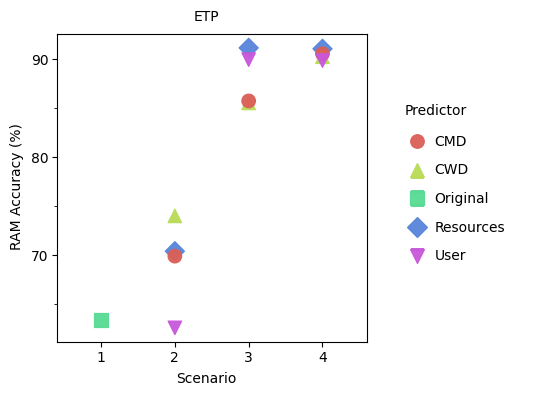

<ggplot: (286164257)>

In [6]:
# https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_point.html
ggplot(df_ETP) + aes(x='Scenario', y='RAM_accuracy(%)', color = 'Predictor') + \
    geom_point(aes(shape = 'Predictor'), size = 5, alpha = 0.95) + \
    labs(title='ETP', x='Scenario', y='RAM Accuracy (%)') + \
    theme_matplotlib() + theme(figure_size=(4, 4))

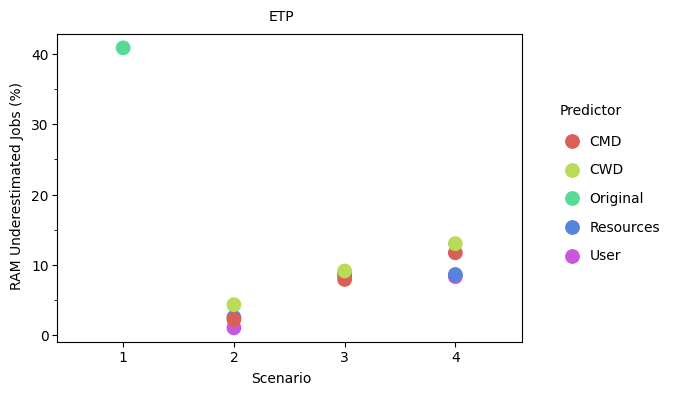

<ggplot: (393680061)>

In [7]:
ggplot(df_ETP) + aes(x='Scenario', y='RAM_underestimatedJobs(%)', color='Predictor') + \
    geom_point(size = 5) + \
    labs(title='ETP', x='Scenario', y='RAM Underestimated Jobs (%)') + \
    theme_matplotlib() + theme(figure_size=(6, 4))

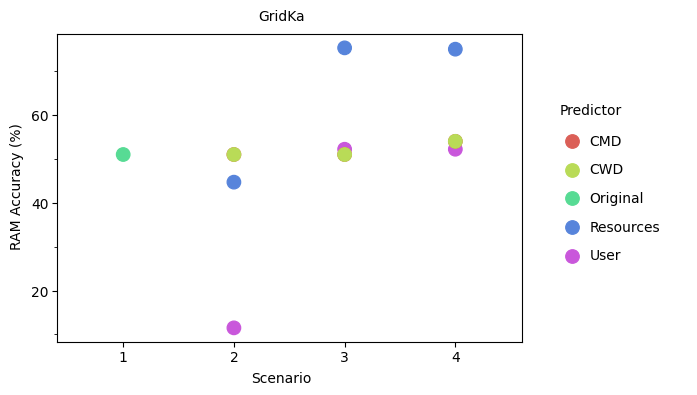

<ggplot: (679683425)>

In [8]:
ggplot(df_GridKa) + aes(x='Scenario', y='RAM_accuracy(%)', color='Predictor') + \
    geom_point(size = 5) + \
    labs(title='GridKa', x='Scenario', y='RAM Accuracy (%)') + \
    theme_matplotlib() + theme(figure_size=(6, 4))

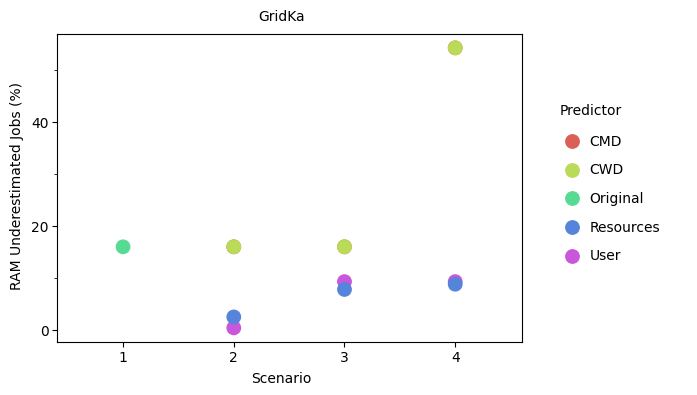

<ggplot: (679688029)>

In [9]:
ggplot(df_GridKa) + aes(x='Scenario', y='RAM_underestimatedJobs(%)', color='Predictor') + \
    geom_point(size = 5) + \
    labs(title='GridKa', x='Scenario', y='RAM Underestimated Jobs (%)') + \
    theme_matplotlib() + theme(figure_size=(6, 4))

#### Plotting all metrics in one plot using [Pandas Reshaping & pivoting](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-and-pivot-tables) (pivot, stack-unstack, [melt](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-by-melt), group-by, etc.) & ggplot facet_wrap
 - [Custom sorting in pandas dataframe](https://stackoverflowcom/a/54301218/), `sort.values()` by key didn't work but `pd.Categorical()` did although a `Categorical` object has limitations.

In [10]:
df_ETP_melted = df_ETP.melt(id_vars=['Scenario', 'Predictor'],
                            value_vars=['RAM_accuracy(%)', 'HDD_accuracy(%)',
                                        'Walltime_accuracy(%)',
                                        'RAM_underestimatedJobs(%)',
                                        'HDD_underestimatedJobs(%)',
                                        'Walltime_underestimatedJobs(%)'],
                            var_name='Metric', value_name='Value')
custom_dict = {'Original':0, 'User':1, 'Resources':2, 'CMD':3, 'CWD':4}
# df_ETP_melted.sort_values(by=['Predictor'], key= lambda x: x.map(custom_dict), inplace=True)
df_ETP_melted['Predictor'] = pd.Categorical(df_ETP_melted['Predictor'],
    categories = sorted(custom_dict, key=custom_dict.get), ordered=True)
print(df_ETP_melted.dtypes, "\n", df_ETP_melted)

Scenario       object
Predictor    category
Metric         object
Value         float64
dtype: object 
    Scenario  Predictor                          Metric  Value
0         1   Original                 RAM_accuracy(%)   63.4
1         2       User                 RAM_accuracy(%)   62.6
2         2  Resources                 RAM_accuracy(%)   70.4
3         2        CMD                 RAM_accuracy(%)   69.9
4         2        CWD                 RAM_accuracy(%)   74.0
5         3       User                 RAM_accuracy(%)   89.9
6         3  Resources                 RAM_accuracy(%)   91.1
7         3        CMD                 RAM_accuracy(%)   85.7
8         3        CWD                 RAM_accuracy(%)   85.5
9         4       User                 RAM_accuracy(%)   89.8
10        4  Resources                 RAM_accuracy(%)   91.0
11        4        CMD                 RAM_accuracy(%)   90.5
12        4        CWD                 RAM_accuracy(%)   90.2
13        1   Original      

/Users/massisenergy/.pyenv/versions/venv_torch-gpu_3.11.2/lib/python3.11/site-packages/plotnine/scales/scale_shape.py:87: PlotnineWarning: Using shapes for an ordinal variable is not advised.


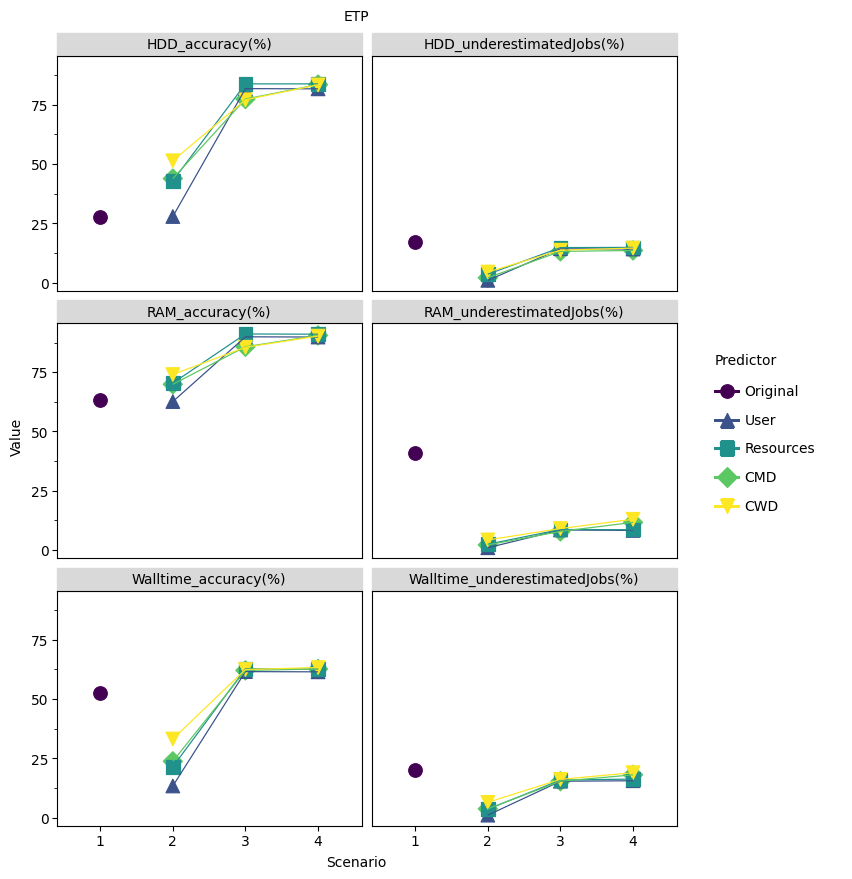

<ggplot: (701833937)>

In [26]:
ggplot(df_ETP_melted) + aes(x='Scenario', y='Value') + \
    geom_point(aes(shape = 'Predictor', color='Predictor'), size = 5) + \
    geom_line(aes(group='Predictor', color='Predictor')) + \
    facet_wrap('~Metric', ncol=2) + \
    labs(title='ETP', x='Scenario', y='Value') + \
    theme_matplotlib() + theme(figure_size=(8, 10))

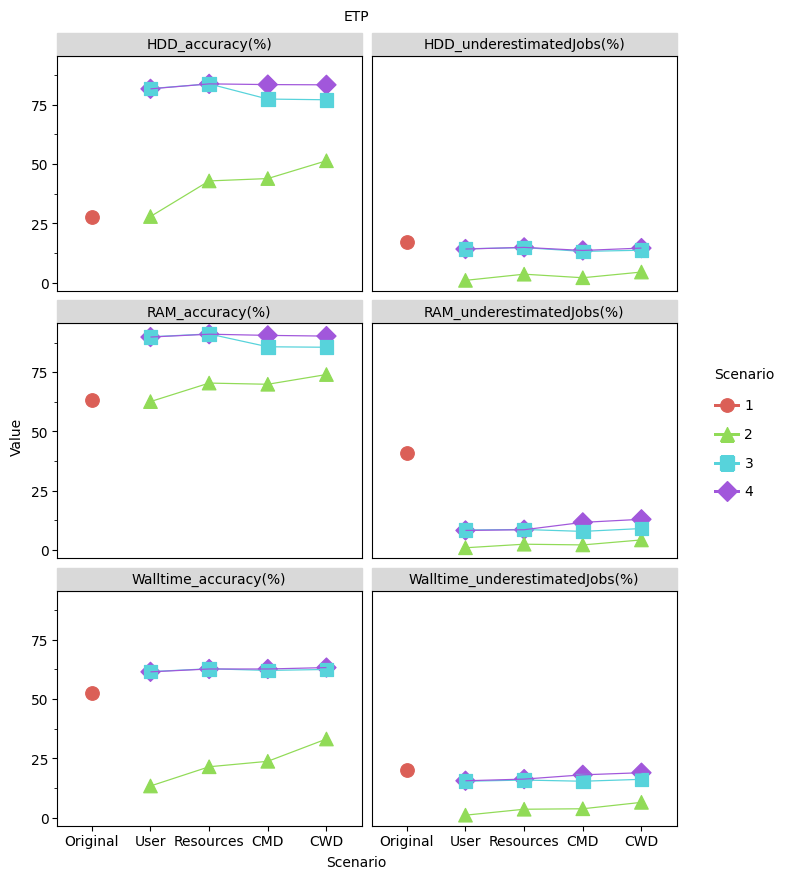

<ggplot: (701496549)>

In [23]:
ggplot(df_ETP_melted) + aes(x='Predictor', y='Value', color='Scenario') + \
    geom_point(aes(shape = 'Scenario'), size = 5) + \
    geom_line(aes(group='Scenario')) + \
    facet_wrap('~Metric', ncol=2) + \
    labs(title='ETP', x='Scenario', y='Value') + \
    theme_matplotlib() + theme(figure_size=(8, 10))

#### GridKa (data wrangling & plotting)

/Users/massisenergy/.pyenv/versions/venv_torch-gpu_3.11.2/lib/python3.11/site-packages/plotnine/scales/scale_shape.py:87: PlotnineWarning: Using shapes for an ordinal variable is not advised.
/Users/massisenergy/.pyenv/versions/venv_torch-gpu_3.11.2/lib/python3.11/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 26 rows containing missing values.
/Users/massisenergy/.pyenv/versions/venv_torch-gpu_3.11.2/lib/python3.11/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 26 rows containing missing values.


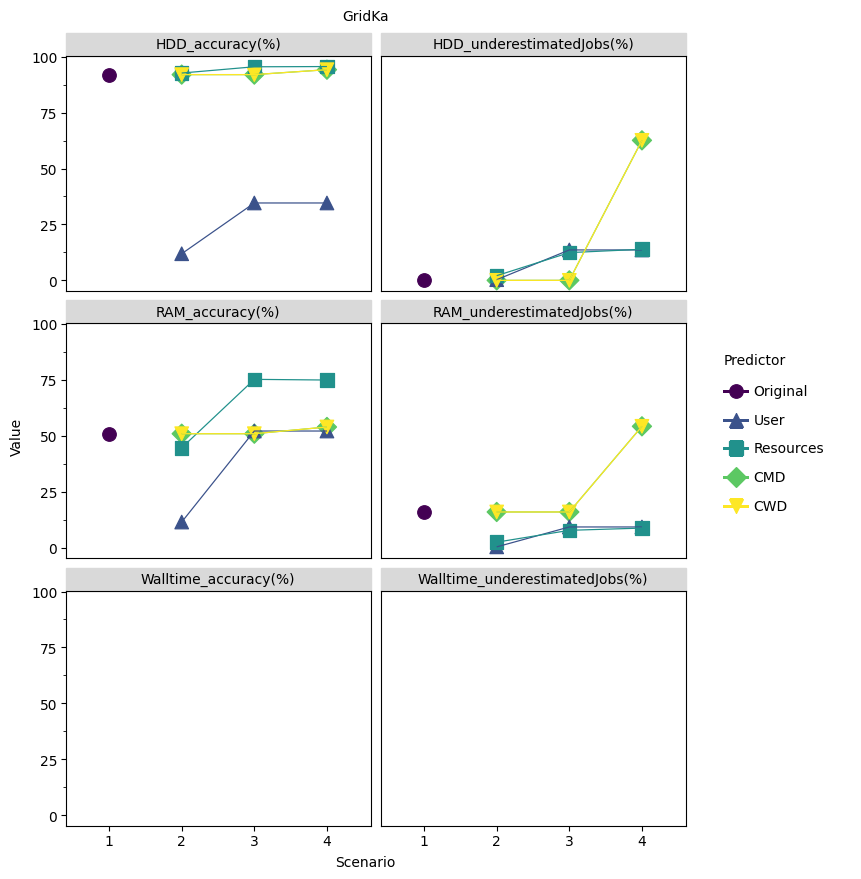

<ggplot: (701091101)>

In [27]:
df_GridKa_melted = df_GridKa.melt(id_vars=['Scenario', 'Predictor'],
                                  value_vars=['RAM_accuracy(%)', 'HDD_accuracy(%)',
                                              'Walltime_accuracy(%)',
                                              'RAM_underestimatedJobs(%)',
                                              'HDD_underestimatedJobs(%)',
                                              'Walltime_underestimatedJobs(%)'],
                                  var_name='Metric', value_name='Value')
custom_dict = {'Original':0, 'User':1, 'Resources':2, 'CMD':3, 'CWD':4}
df_GridKa_melted['Predictor'] = pd.Categorical(df_GridKa_melted['Predictor'],
        categories = sorted(custom_dict, key=custom_dict.get), ordered=True)
# print(df_GridKa_melted.dtypes, "\n", df_GridKa_melted)

ggplot(df_GridKa_melted) + aes(x='Scenario', y='Value') + \
    geom_point(aes(shape = 'Predictor', color='Predictor'), size = 5) + \
    geom_line(aes(group='Predictor', color='Predictor')) + \
    facet_wrap('~Metric', ncol=2) + \
    labs(title='GridKa', x='Scenario', y='Value') + \
    theme_matplotlib() + theme(figure_size=(8, 10))

/Users/massisenergy/.pyenv/versions/venv_torch-gpu_3.11.2/lib/python3.11/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 26 rows containing missing values.
/Users/massisenergy/.pyenv/versions/venv_torch-gpu_3.11.2/lib/python3.11/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 26 rows containing missing values.


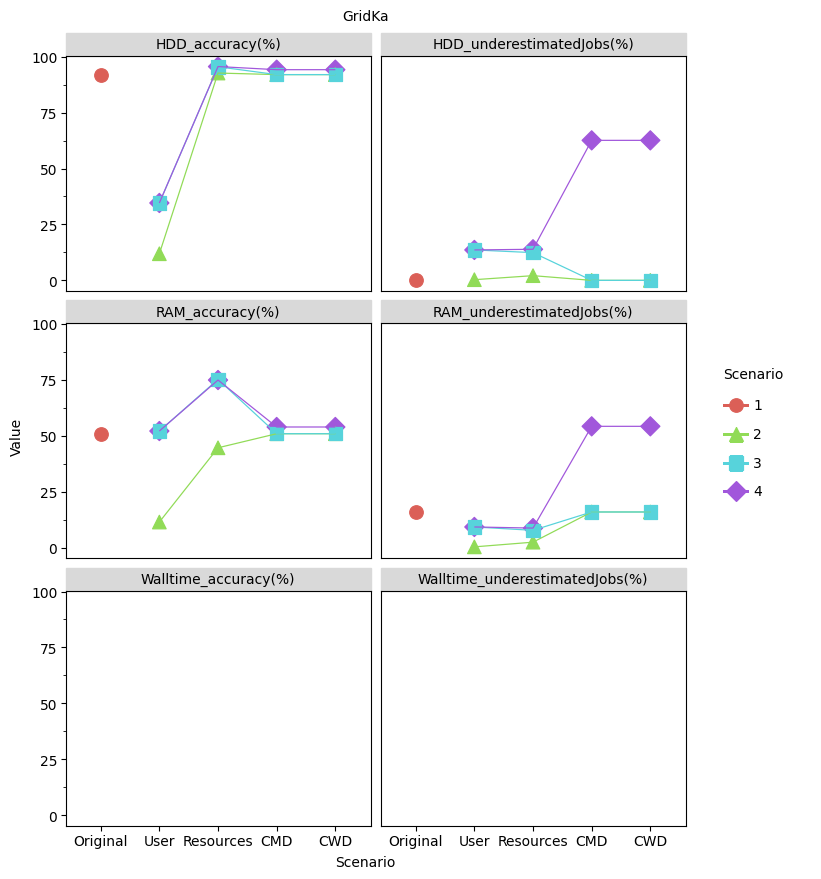

<ggplot: (286171349)>

In [20]:
ggplot(df_GridKa_melted) + aes(x='Predictor', y='Value', color='Scenario') + \
    geom_point(aes(shape = 'Scenario'), size = 5) + \
    geom_line(aes(group='Scenario')) + \
    facet_wrap('~Metric', ncol=2) + \
    labs(title='GridKa', x='Scenario', y='Value') + \
    theme_matplotlib() + theme(figure_size=(8, 10))

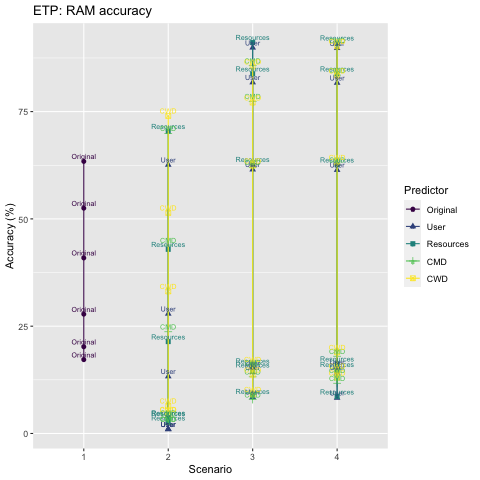

In [33]:
%%R -i df_ETP_melted -i df_GridKa_melted
library(ggplot2)
library(gridExtra)
# library(ggpubr)

p1 <- ggplot(df_ETP_melted, aes(x=Scenario, y=Value, color=Predictor)) +
    geom_point(aes(shape = ), size=2) + geom_line(size=0.5) +
    geom_text(aes(label=Predictor), vjust=-0.5, size=2.5) +
    ggtitle("ETP: RAM accuracy") + xlab("Scenario") +
    ylab("Accuracy (%)")

p1

In [ ]:
get_ipython().run_cell_magic("R", "-i df_ETP_melted -i df_GridKa",
'''
library(ggplot2)
    ggplot(df_ETP_melted, aes(x=Predictor, y=Value, color=Scenario))+
    geom_point(aes(shape = 'Scenario'), size = 5)+
    facet_wrap(df_ETP_melted$Metric, ncol=2)
''')